In [1]:
from mcmc import *
from fit import *
from process_showers import ProcessEvents
from config import CounterConfig
# from datafiles import *
import matplotlib.pyplot as plt
plt.ion()
from utils import plot_event, plot_generator, get_data_files, preceding_noise_file


data_date_and_time = '20190504034237'
data_files = get_data_files(data_date_and_time)
noise_files = [preceding_noise_file(f) for f in data_files]
cfg = CounterConfig(data_files, noise_files)
# ckv = GetCkv(cfg)

In [2]:
pars = [576.,2.e6,np.deg2rad(40.),np.deg2rad(315.), 450., -660.,-25.25,0,70]
ev = BasicParams.get_event(pars)
pe = ProcessEvents(cfg, frozen_noise=False)
real_nfits = pe.gen_nfits_from_event(ev)
pf = NichePlane(real_nfits)
ty = tyro(real_nfits)

In [3]:
pf.theta

0.7524475310519761

In [4]:
guess = make_guess(ty,pf,cfg)
pardict = {p.name:pars[i] for i,p in enumerate(guess[:-1])}
pardict['t_offset'] = 80.

In [5]:
pt = PeakTimes(real_nfits, BasicParams, cfg)
pt.target_parameters = ['zenith','azimuth']
m = init_minuit(pt, guess)
m.tol = .1
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.53 (χ²/ndof = 1.8)      │              Nfcn = 57               │
│ EDM = 0.0949 (Goal: 0.1)         │           time = 16.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    500    │    50     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │   0.1e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 693.49e-3 │  0.21e-3  │            │            │    0    │0.852448 │       │
│ 3 │ azimuth  │  5.50350  │  0.00023  │            │            │ 5.33725 │ 5.53725 │       │
│ 4 │ corex    │    451    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -679    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -150   │   150   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Now with a good estimate for the angles, we can fit the pulse widths to estimate xmax.

In [6]:
guess = update_guess_values(guess, m)
pw = PulseWidth(real_nfits, BasicParams, cfg)
pw.target_parameters = ['xmax']
m = init_minuit(pw, guess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 133.8 (χ²/ndof = 13.4)     │              Nfcn = 11               │
│ EDM = 0.133 (Goal: 0.1)          │            time = 3.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    548    │    20     │            │            │   400   │   800   │       │
│ 1 │ nmax     │   0.1e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │   0.693   │   0.017   │            │            │    0    │0.852448 │  yes  │
│ 3 │ azimuth  │   5.503   │   0.017   │            │            │ 5.33725 │ 5.53725 │  yes  │
│ 4 │ corex    │    451    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -679    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -150   │   150   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Now, with a good estimate for log(xmax), we can fit the integrated pulse areas for nmax.

In [7]:
guess = update_guess_values(guess, m)
pa = PulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['nmax']
m = init_minuit(pa, guess)
m.simplex(ncall=20)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 522.7 (χ²/ndof = 52.3)     │              Nfcn = 21               │
│ EDM = 0.0395 (Goal: 0.1)         │            time = 8.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    550    │    50     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  1.85e6   │  0.05e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │   0.693   │   0.017   │            │            │    0    │0.852448 │  yes  │
│ 3 │ azimuth  │   5.503   │   0.017   │            │            │ 5.33725 │ 5.53725 │  yes  │
│ 4 │ corex    │    451    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -679    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -150   │   150   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Now, with these values in the ballpark, we can simultaneously minimize both the shower profile and core position by fitting the normalized pulse areas.

In [8]:
guess = update_guess_values(guess, m)
pa = NormalizedPulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['xmax','nmax','corex','corey']
m = init_minuit(pa, guess)
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.57 (χ²/ndof = 1.9)      │              Nfcn = 89               │
│ EDM = 0.0732 (Goal: 0.1)         │           time = 35.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   576.8   │    1.3    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  1.969e6  │  0.021e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │   0.693   │   0.017   │            │            │    0    │0.852448 │  yes  │
│ 3 │ azimuth  │   5.503   │   0.017   │            │            │ 5.33725 │ 5.53725 │  yes  │
│ 4 │ corex    │   449.3   │    0.7    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -660.4   │    0.7    │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -150   │   150   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [9]:
guess = update_guess(m)
at = AllTunka(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 606.3 (χ²/ndof = 14.1)     │              Nfcn = 71               │
│ EDM = 7.01e-05 (Goal: 0.0002)    │           time = 28.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   576.8   │    1.3    │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  1.969e6  │  0.021e6  │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │   0.693   │   0.017   │            │            │    0    │0.852448 │  yes  │
│ 3 │ azimuth  │   5.503   │   0.017   │            │            │ 5.33725 │ 5.53725 │  yes  │
│ 4 │ corex    │   449.3   │    0.7    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │  -660.4   │    0.7    │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │  80.312   │   0.005   │            │            │  -150   │   150   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │     xmax     nmax   zenith  azimuth    corex    corey    corez       x0   lambda t_offset │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│     xmax │        0        0        0        0        0        0        0        0        0        0 │
│     nmax │        0        0        0        0        0        0        0        0        0        0 │
│   zenith │        0        0        0        0        0        0        0        0        0        0 │
│  azimuth │        0        0        0        0        0        0        0        0        0        0 │
│    corex │        0        0        0        0        0        0        0        0        0        0 │
│    corey │        0        0        0        0        0        0        0        0        0        0 │
│    corez │        0        0        0        0        0        0        0        0        0        0 │
│       x0 │        0        0        0        0        0        0        0        0        0        0 │
│   lambda │        0        0        0        0        0        0        0        0        0        0 │
│ t_offset │        0        0        0        0        0        0        0        0        0 2.33e-05 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [10]:
guess = update_guess(m)
at = AllSamples(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)


In [11]:
m.tol=.1
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['zenith'] = False
m.fixed['azimuth'] = False
m.fixed['corex'] = False
m.fixed['corey'] = False
m.fixed['t_offset'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 218.5 (χ²/ndof = 1.0)      │              Nfcn = 315              │
│ EDM = 0.149 (Goal: 0.1)          │           time = 98.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  575.18   │   0.21    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  2.007e6  │  0.005e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 697.99e-3 │  0.10e-3  │            │            │    0    │0.852448 │       │
│ 3 │ azimuth  │  5.49782  │  0.00025  │            │            │ 5.33725 │ 5.53725 │       │
│ 4 │ corex    │  449.76   │   0.05    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -660.04  │   0.05    │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │   -25.3   │    1.0    │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │         │         │  yes  │
│ 9 │ t_offset │  80.3019  │  0.0017   │            │            │  -150   │   150   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [12]:
guess = update_guess_values(guess, m)
guessdict = {p.name:p for p in guess}
# guessdict['xmax'].limits = (guessdict['xmax'].value - 50., guessdict['xmax'].value + 50.)
# guessdict['nmax'].limits = (guessdict['nmax'].value - 2.e5, guessdict['nmax'].value + 2.e5)
# guessdict['zenith'].limits = (guessdict['zenith'].value - 5.e-3, guessdict['zenith'].value + 5.e-3)
# guessdict['azimuth'].limits = (guessdict['azimuth'].value - 5.e-3, guessdict['azimuth'].value + 5.e-3)
# guessdict['corex'].limits = (guessdict['corex'].value - 5., guessdict['corex'].value + 5.)
# guessdict['corey'].limits = (guessdict['corey'].value - 5., guessdict['corey'].value + 5.)
# guessdict['zenith'].fixed = True
# guessdict['azimuth'].fixed = True
# guessdict['corex'].fixed = True
# guessdict['corey'].fixed = True
guessdict['corez'].fixed = True
guessdict['x0'].fixed = True
guessdict['lambda'].fixed = True
# guessdict['t_offset'].fixed = True

In [13]:
initial_guessdict = {p.name:p.value for p in guess}
initial_guessdict['t_offset'] = 80.

In [14]:
names = [p.name for p in guess if not p.fixed]
ndim = len(names)

In [15]:
sampler, pos, prob, state = main(at,guess,niter=5000,nwalkers=ndim*2)

100%|███████████████████████████████████████████████████| 5000/5000 [3:19:06<00:00,  2.39s/it]


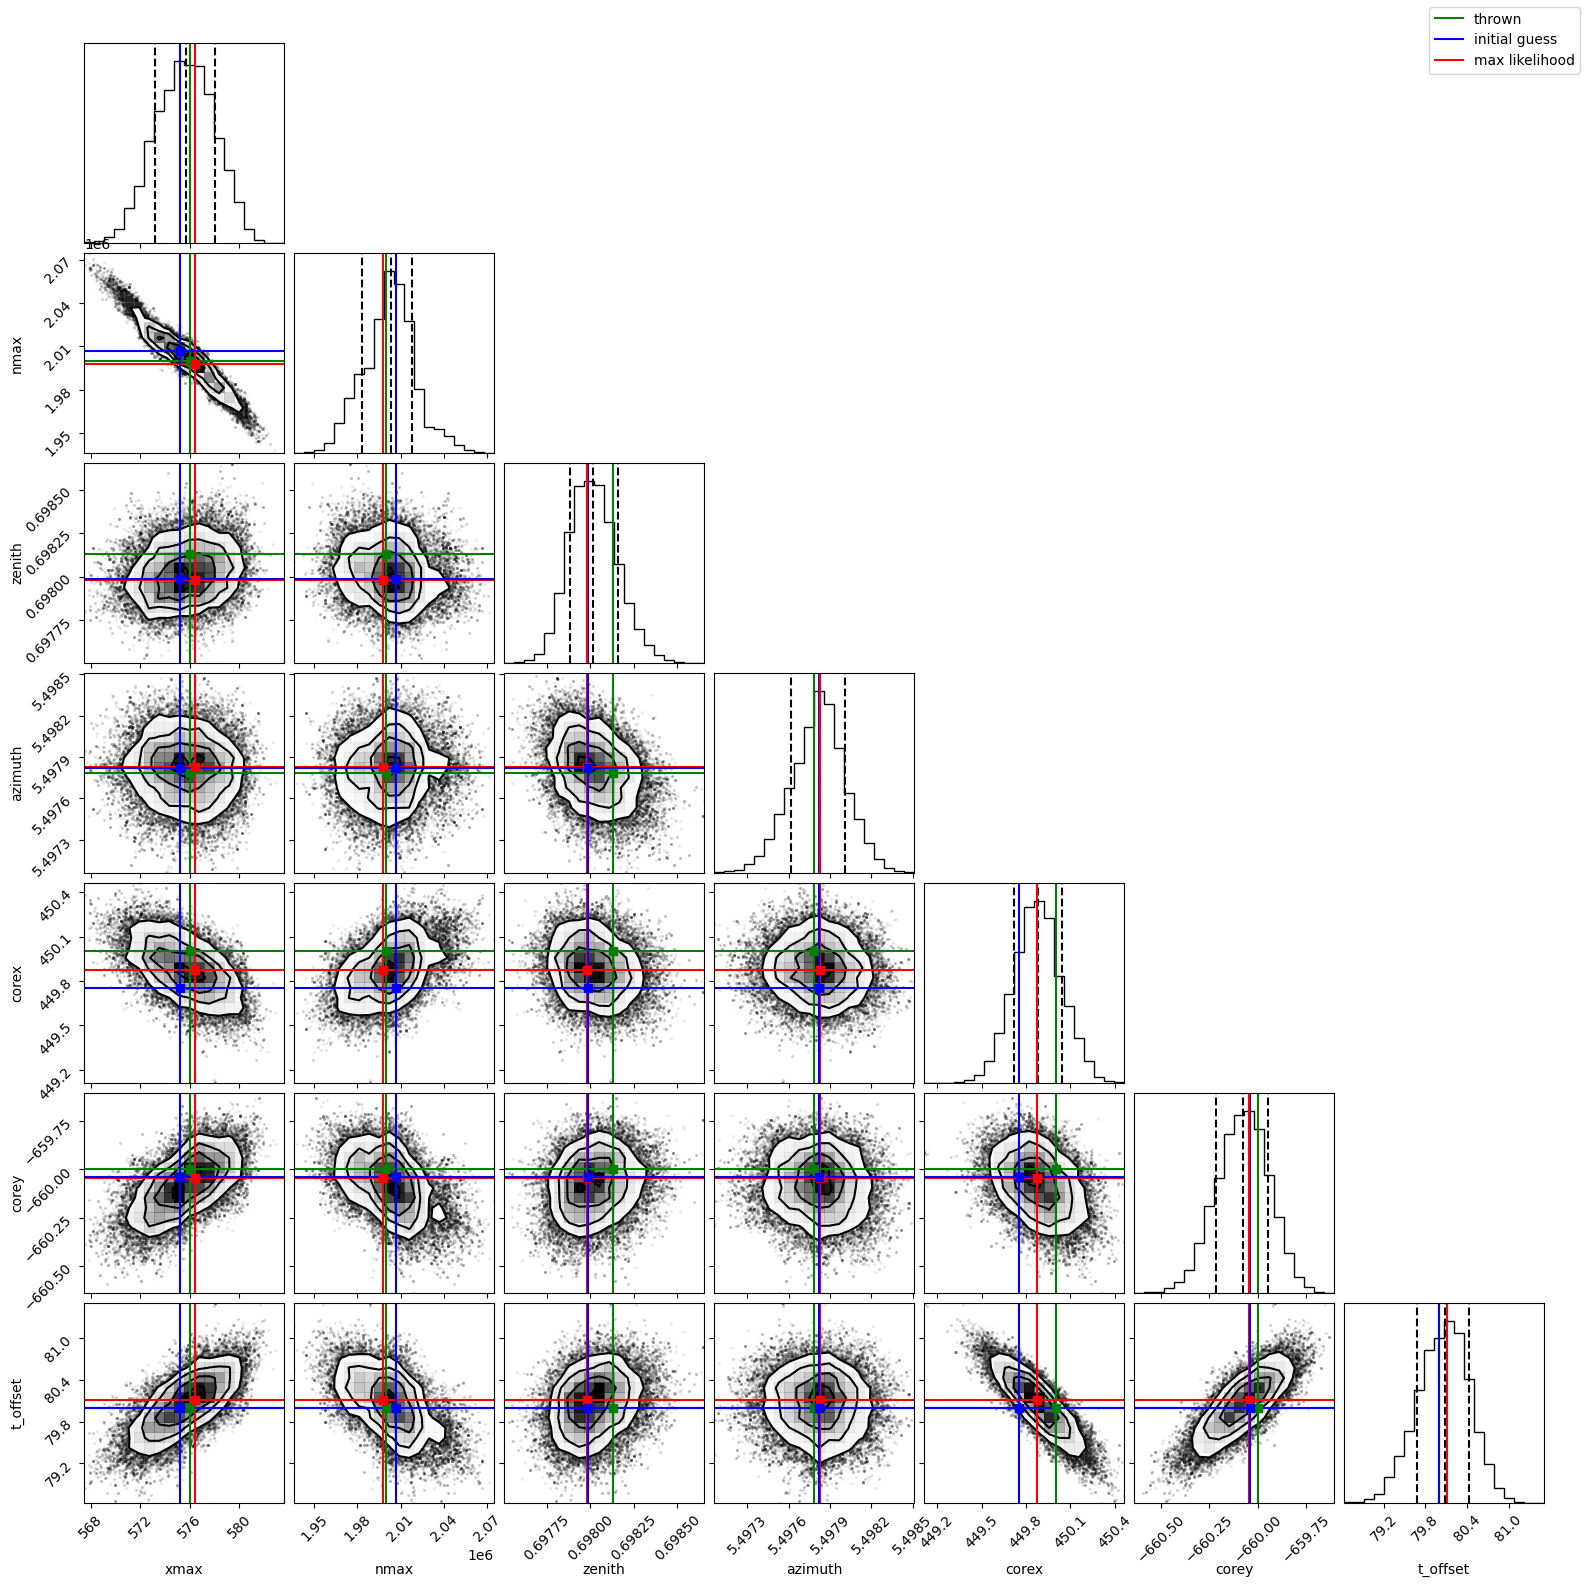

In [23]:
flat_samples = sampler.get_chain(discard=500,flat=True)

samples = sampler.flatchain
best_sample = samples[np.argmax(sampler.flatlnprobability)]

fig = corner.corner(flat_samples,labels=names,quantiles=[0.16, 0.5, 0.84])

axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i,name in enumerate(names):
    ax = axes[i, i]
    ax.axvline(pardict[name], color="g", label='thrown')
    ax.axvline(initial_guessdict[name], color="b", label='initial guess')
    ax.axvline(best_sample[i], color="r", label = 'max likelihood')
    if i == 0:
        fig.legend()
    # ax.set_xlim(np.min([pardict[names[i]],initial_guessdict[names[i]],best_sample[i]]),np.max([pardict[names[i]],initial_guessdict[names[i]],best_sample[i]]))

    # Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        # ax.set_xlim(np.min([pardict[names[xi]],initial_guessdict[names[xi]],best_sample[xi]]),np.max([pardict[names[xi]],initial_guessdict[names[xi]],best_sample[xi]]))
        # ax.set_ylim(np.min([pardict[names[yi]],initial_guessdict[names[yi]],best_sample[yi]]),np.max([pardict[names[yi]],initial_guessdict[names[yi]],best_sample[yi]]))
        ax.axvline(pardict[names[xi]], color="g")
        ax.axvline(best_sample[xi], color="r")
        ax.axhline(pardict[names[yi]], color="g")
        ax.axhline(best_sample[yi], color="r")
        ax.axvline(initial_guessdict[names[xi]], color="b")
        ax.axhline(initial_guessdict[names[yi]], color="b")
        ax.plot(pardict[names[xi]], pardict[names[yi]], "sg")
        ax.plot(best_sample[xi], best_sample[yi], "sr")
        ax.plot(initial_guessdict[names[xi]], initial_guessdict[names[yi]], "sb")

In [17]:
pars

[576.0,
 2000000.0,
 0.6981317007977318,
 5.497787143782138,
 450.0,
 -660.0,
 -25.25,
 0,
 70]

In [18]:
guessdict = {p.name:p.value for p in guess}

In [19]:
np.array(list(guessdict.values()))

array([ 5.75182978e+02,  2.00685846e+06,  6.97986106e-01,  5.49782338e+00,
        4.49756114e+02, -6.60041497e+02, -2.52500000e+01,  0.00000000e+00,
        7.00000000e+01,  8.03019388e+01])

In [20]:
len(flat_samples)

7000

In [21]:
best_sample

array([ 5.76407186e+02,  1.99762132e+06,  6.97983292e-01,  5.49782636e+00,
        4.49872676e+02, -6.60045508e+02,  8.01143618e+01])

In [22]:
len(real_nfits)

11